# Проверка гипотез

Подготовлен список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

## Предобработка данных

In [2]:
try:
    hypothesis = pd.read_csv(--)
    orders = pd.read_csv(--)
    visitors = pd.read_csv(--)
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

    

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Узнаем нет ли посетителий находящихся в обоих группах

In [7]:
ab_visitors = orders.groupby('visitorId', as_index=False).agg({'group': 'nunique'})
ab_visitors = ab_visitors[ab_visitors['group'] > 1]['visitorId']

In [8]:
len(ab_visitors)

58

In [9]:
orders = orders[np.logical_not(orders['visitorId'].isin(ab_visitors))]

In [10]:
ab_visitors_2 = orders.groupby('visitorId', as_index=False).agg({'group': 'nunique'})
ab_visitors_2 = ab_visitors_2[ab_visitors_2['group'] > 1]['visitorId']
ab_visitors_2

Series([], Name: visitorId, dtype: int64)

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null object
revenue          1016 non-null int64
group            1016 non-null object
dtypes: int64(3), object(2)
memory usage: 47.6+ KB


In [12]:
orders.duplicated().sum()

0

In [13]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [14]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
visitors.duplicated().sum()

0

In [17]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [18]:
pd.set_option("max_colwidth", 400)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


## Приоретизация гипотез

Приоретизируем гипотезы согластно фреймворкам ICE и RICE.


$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [19]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [20]:
hypothesis.sort_values('ICE', ascending=False).head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0


In [21]:
hypothesis.sort_values('RICE', ascending=False).head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


Мы видим большие различия в результатах фреймворков ICE и RICE. 8 гипотеза деймтвителько оказывает большой вклад и уверенность в этом велика однако она влияет на очень малое количество пользователей, то же самое можно сказать о гипотезе 0. Однако по RICE она онабрало одинаковое количество баллов с 6 гипотезой которая находиться на том же месте что и при применении ICE.  

Самой перспективной гипотезой можно назвать 7 гипотезу так как стоимость ее воплощения такая же как и у 8 но она затрагивает 100% пользователей

## Анализ A/B-теста

Расчитаем дневные и кумулятивные показатели.

In [22]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date','visitors']]
visitorsADaily.columns = ['date','visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date','visitors']]
visitorsBDaily.columns = ['date','visitorsPerDateB']

In [23]:
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
    {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date','visitorsCummulativeA']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
    {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date','visitorsCummulativeB']


In [24]:
ordersADaily = (
    orders[orders['group'] == 'A'][['transactionId','visitorId','date','revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['transactionId','visitorId','date','revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [25]:
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
    {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA'
]

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
    {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB'
]

Объеденим их в одну таблицу.

In [26]:
data = (ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
       )


In [27]:
data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


### Куммулятивная выручка

C:\Users\sab\anaconda3\envs\praktikum\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


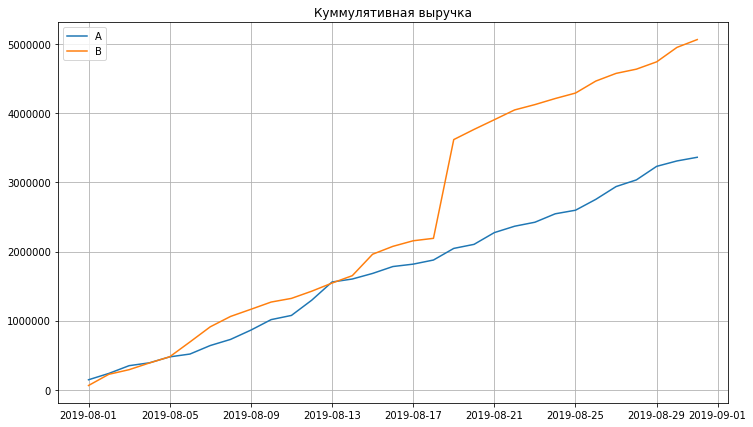

In [28]:
plt.figure(figsize=(12,7))
plt.plot(
    data['date'],
    data['revenueCummulativeA'], label='A')
plt.plot(
    data['date'],
    data['revenueCummulativeB'], label='B')
plt.grid()
plt.legend()
plt.title('Куммулятивная выручка')
plt.show()

Куммулятивная выручка группы В резко выросла 2019-08-18 после чего группа А и Б росли примерно одинаково. Возможно в этот день были совершены один или несколько больших заказов что повлияло на показатель группы Б. 

### Куммулятивный средний чек

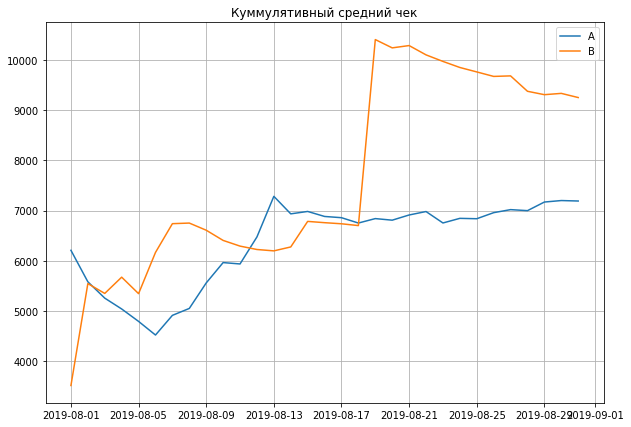

In [29]:
plt.figure(figsize=(10,7))
plt.plot(data['date'],
        (data['revenueCummulativeA'] / data['ordersCummulativeA']),
         label='A')
plt.plot(data['date'],
        (data['revenueCummulativeB'] / data['ordersCummulativeB']),
         label='B')
plt.title('Куммулятивный средний чек')
plt.grid()
plt.legend()
plt.show()

Мы видим похожую ситуацию с куммулятивной выручкой, сильные колебания среднего чека вплоть до 18 августа, после чего средний чек группы В сильно вырос а позже начал снижаться.   

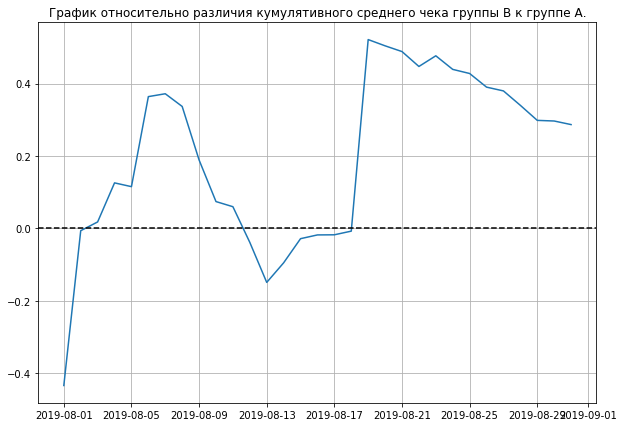

In [30]:
plt.figure(figsize=(10,7))
plt.plot(data['date'],
        (data['revenueCummulativeB'] / data['ordersCummulativeB'])
        / (data['revenueCummulativeA'] / data['ordersCummulativeA']) - 1)
plt.title('График относительно различия кумулятивного среднего чека группы B к группе A.')
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.show()

График резко скачет, скорее всего в группу В попались крупные заказы

### Куммулятивная конверсия

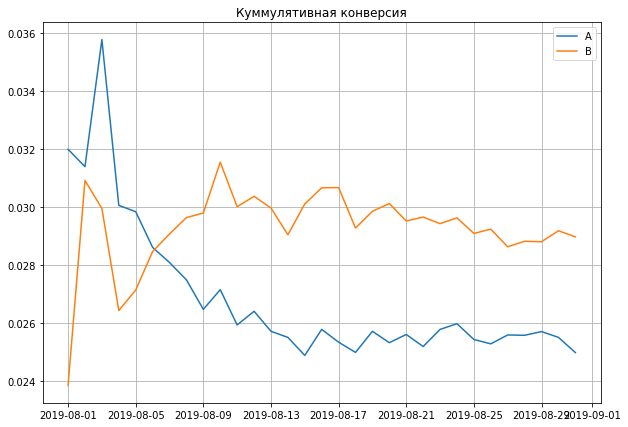

In [31]:
plt.figure(figsize=(10,7))
plt.plot(data['date'],
        (data['ordersCummulativeA'] / data['visitorsCummulativeA']),
         label='A')
plt.plot(data['date'],
        (data['ordersCummulativeB'] / data['visitorsCummulativeB']),
         label='B')
plt.title('Куммулятивная конверсия')
plt.grid()
plt.legend()
plt.show()

Графики обоих груп сильно колебались одна после этого стабилизировались и конверсия у группы В выше.

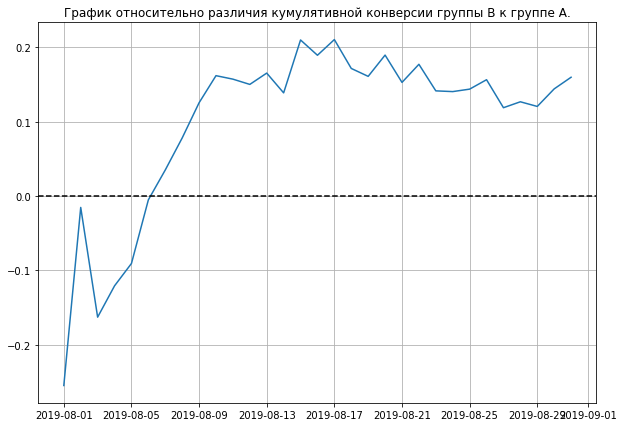

In [32]:
plt.figure(figsize=(10,7))
plt.plot(data['date'],
        (data['ordersCummulativeB'] / data['visitorsCummulativeB'])
        / (data['ordersCummulativeA'] / data['visitorsCummulativeA']) - 1)
plt.title('График относительно различия кумулятивной конверсии группы B к группе A.')
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.show()

Конверсия группы В начиня с 6 августа стабильно больше конверсии группы А

### Количество заказов

In [33]:
ordersByUsers = (
    orders.drop(['group','revenue','date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId','orders']

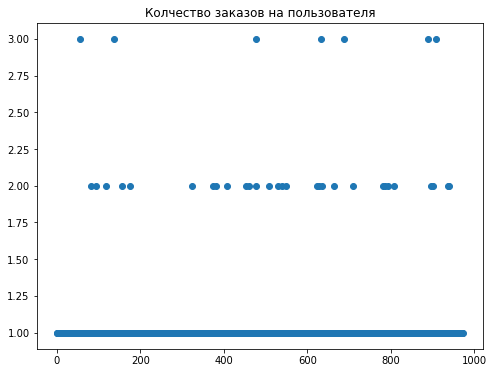

In [34]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(8,6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Колчество заказов на пользователя')
plt.show()

In [35]:
np.percentile(ordersByUsers['orders'], [95,99])

array([1., 2.])

In [36]:
np.percentile(ordersByUsers['orders'], [96,97])

array([1., 2.])

Не более 4 процентов пользователей оформляли более 1 заказа. Следовательно пользователей с количеством заказов больше 1 бумем считать выбросом.

### Выручка

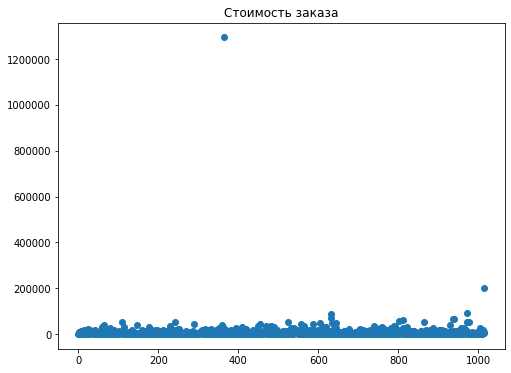

In [37]:
x_values_2 = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(8,6))
plt.scatter(x_values_2, orders['revenue'])
plt.title('Стоимость заказа')
plt.show()

In [38]:
np.percentile(orders['revenue'],[95,99])

array([26785., 53904.])

Не более 5 процентов заказов превышают стоимость в 26785. Заказы стоимостью выше мы будем считать выбросами.

### Статистическая значимость 

<a id='s1'> </a>

Сформулируем гипотезы для конверсии и среднего чека

Конверсия: Но - статистически значимых различий в конверсии между группами нет. Н1-  статистически значимые различия в конверсии между группами есть.

Средний чек: Но - статистически значимых различий в среднем чеке между группами нет. Н1-  статистически значимые различия в среднем чеке между группами есть.

Проверим эти гипотезы сначала на "сырых" данных.

#### Сырые данные

In [39]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId','orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId','orders']

In [40]:
sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0,
               index=np.arange(data['visitorsPerDateA'].sum()
               - len(ordersByUsersA['orders'])), name='orders')],
    axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],
    pd.Series(0,
             index=np.arange(data['visitorsPerDateB'].sum()
             - len(ordersByUsersB['orders'])), name='orders')],
    axis=0)

In [41]:
sampleA

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

In [42]:
sampleA.sum() + sampleB.sum()

1016

In [43]:
len(orders)

1016

In [44]:
print('p-value:{0:.4f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост конверсии группы В: {0:.2%}'
     .format(sampleB.mean() / sampleA.mean() -1))

p-value:0.0055
Относительный прирост конверсии группы В: 15.98%


P-value меньше 0.05 значит гипотезу о том что статистически значимых различий в конверсии между группами нет, отвергаем. 

Так же относительный прирост конверсии группы В относительно группы А составил 15.98%. 

In [45]:
print('P-value:{0:.4f}'
      .format(stats.mannwhitneyu(
          orders[orders['group'] == 'A']['revenue'],
          orders[orders['group'] == 'B']['revenue'])
      [1])
)
print('Относительное различие среднего чека между группами: {0:.2%}'
     .format(
         orders[orders['group'] == 'B']['revenue'].mean()
         / orders[orders['group'] == 'A']['revenue'].mean() 
         - 1))     

P-value:0.4147
Относительное различие среднего чека между группами: 28.66%


P-value больше 0.05 значит нулевую гипотезу о том что статистически значимых различий в среднем чеке между группами нет, не отвергаем.

При этом средний чек группы В на 28.66% выше чем у группы А.

#### Очищенные данные

In [46]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorId']
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']


In [47]:
abnormalUsers = (
    pd.concat(
        [usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [48]:
abnormalUsers.shape

(86,)

86 аномальных пользователей

In [49]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0
)

sampleBFiltered =  pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0
)


In [50]:
print('P-value: {0:.4f}'
     .format(stats.mannwhitneyu(
         sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы В: {0:.2%}'
     .format(
         sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

P-value: 0.0080
Относительный прирост конверсии группы В: 17.39%


P-value меньше 0.05 значит гипотезу о том что статистически значимых различий в конверсии между группа нет, отвергаем.


Так же относительный прирост конверсии группы В относительно группы А составил 17.39%, что больше чем в сырых данных.

In [51]:
print('P-value: {0:.4f}'
      .format(stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие среднего чека между группами: {0:.2%}'
      .format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


P-value: 0.3636
Относительное различие среднего чека между группами: -3.37%


P-value больше 0.05 значит нулевую гипотезу о том что статистически значимых различий в среднем чеке между группами нет, не отвергаем.

При этом средний чек в группе В ниже на 3.37% чем в группе А, что сильно отличается от сырых данных.

## Вывод

Есть статистически значимые различия между конверсией групп А и В, как в "сырых" данных так и после фильтрации аномалий. В фильтрованных данных относительный прирост конверсии составляет 17.39%.

Однако мы необнаружили статистически значимого различия по среднему чеку между группами ни по "сырым", ни по данным после фильтрации аномалий. Однако данные по относительному различию сильно разняться.

График различия конверсии между группами говорит о том что группа В стабильно лучше группы А.

А график относительного различия среднего чека говорит о том что есть тенденция к снижению.

Я считаю что целесообразным будет продолжить тест чтобы оценить данные по среднему чеку.